In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import scipy
from scipy import  stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [51]:
data =pd.read_csv('dataset/house_predictions_kaggle/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
data.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [12]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

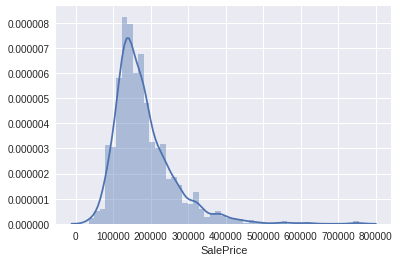

In [19]:
sns.distplot(data['SalePrice'])
plt.show()

In [35]:
print("Skewness: ",data['SalePrice'].skew())
print("Skewness: ",data['SalePrice'].kurt())


('Skewness: ', 1.8828757597682129)
('Skewness: ', 6.5362818600645287)


In [56]:
from keras.models import Sequential
from keras.layers import  Dense,Flatten,activations
from sklearn.preprocessing import  StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import DictVectorizer as DV

In [80]:
data_num = data._get_numeric_data()
data_cat = data.select_dtypes(include=["object"]).copy()
print(data.columns.size)
print(data_num.columns.size)
print(data_cat.columns.size)
print(data.shape)
data_cat = data_cat.fillna("zero",axis=1)

81
38
43
(1460, 81)


In [81]:
data_cat[data_cat.isnull().any(axis=1)]
#data_cat = data_cat.drop('Alley',axis=1)
data_cat[data_cat.isnull().any(axis=1)]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition


In [106]:
tot=0
for i in data_cat.columns.tolist():
    j = len(data_cat[i].value_counts())
    tot += j
print(tot)

268


In [105]:
len(data_cat['MSZoning'].value_counts())

5

In [58]:
#vectoizing the categorical values
vect = DV(sparse=False)
vect_values = vect.fit_transform(data_cat.values)
##one hot encoding the categorical values

enc = OneHotEncoder()
enc.fit(data_cat.values)


AttributeError: 'numpy.ndarray' object has no attribute 'iteritems'

In [37]:
model = Sequential()
model.add(Dense(79))